<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
The [Istio Leadership Dataset](https://github.com/geekygirldawn/k8s_data/tree/main/datasets) and the analysis in this notebook were created by [Dawn Foster](https://fastwonderblog.com/) and are licensed under the [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

# Summary of Istio Leadership Positions
**Important Caveat**: The affiliation data is only as good as what people put on their GitHub profiles and in the CNCF database (see below).

Overall, 28% of Istio leaders work at Google. 11% work at Solo.io. 9% of leaders work at IBM and 7% at Red Hat or 16% if you consider them a single entity, since IBM owns Red Hat, but in my experience they tend to operate relatively independently.

You can compare this to the [Istio Leadership Analysis from April 2022](Istio_Leadership_Analysis_Before_CNCF_2022-04.ipynb) as Istio was joining the CNCF where about 50% of the leaders were at Google and both IBM and Red Hat had more leaders that Solo.io.

![Graph of all leaders by company](istio_graphs_2023-06-28/all_leaders.png)

![Graph of top leaders by company](istio_graphs_2023-06-28/top_leaders.png)

This notebook contains data structures that allow you to further explore the data and see exactly how these charts were created and how the data was analyzed.

### Dataset Summary
* The source of this data is the Istio [teams.yaml](https://github.com/istio/community/commits/master/org/teams.yaml) file. 
* The leadership roles were read from the yaml file and stored in the [owners_data_istio_2022-04-25.csv](owners_data_istio_2022-04-25.csv) file. Release teams for specific releases were excluded.
* The GitHub REST API was used as a starting point to populate company information, since that's likely the most up to date source. [CNCF Affiliation](https://github.com/cncf/gitdm) data was used to fill in missing data if available.
* There are 280 leadership roles (with duplicates), 100 users, 23 companies, and 4 people with 'Unknown' affiliations.
* There is quite a bit of duplication when just looking at roles, since there are "Maintainer" roles, "WG Maintainer", and WG subteams, and many people hold multiple positions that likely cover most of the same work.


In [2]:
import pandas as pd

# Read CSV skipping the 5 rows with dataset license info
#istioDF = pd.read_csv('owners_data_istio_2022-04-22.csv', skiprows=5)
istioDF = pd.read_csv('owners_data_istio_2023-06-28.csv', skiprows=5)
# Data Cleanup

# Remove some accounts that aren't people
istioDF.drop(istioDF[istioDF.username.str.startswith('istio')].index, inplace=True)

# Map companies to remove duplicates, and map everything that isn't an org into a single 'Unknown' category
istioDF.company = istioDF.company.replace({r'^.*oogle.*$': 'Google LLC', 
                                  r'^.*IBM.*$': 'IBM',
                                  'International Business Machines Corporation' : 'IBM',
                                  r'^.*solo.*$': 'Solo.io',
                                  'Independent' : 'Unknown',
                                  r'^.*etrate.*$' : 'Tetrate.io',
                                  'Istio' : 'Unknown',
                                  r'^.*libaba.*$' : 'Alibaba',
                                  r'Cisco.*$' : 'Cisco Systems',
                                  r'^.*tripe.*$' : 'Stripe',
                                  r'^.*ntel.*$' : 'Intel',
                                  r'^.*Red.*$' : 'Red Hat',
                                  r'^.*Salesf.*$' : 'Salesforce',      
                                  '@Tencent' : 'Tencent',
                                  'NotFound' : 'Unknown'}, regex=True)

istioDF

,company,username,team
0,Unknown,cetezadi,Election Officers
1,ARMO,craigbox,Election Officers
2,Red Hat,jberkus,Election Officers
3,Solo.io,rvennam,Election Officers
4,@aviatrixsystems,adiprerepa,Maintainers
...,...,...,...
269,DaoCloud Network Technology Co. Ltd.,hanxiaop,WG - User Experience Maintainers
270,Intel,irisdingbj,WG - User Experience Maintainers
271,Aviatrix,nmittler,WG - User Experience Maintainers
272,@Aviatrix,therealmitchconnors,WG - User Experience Maintainers


## Data by GitHub username

In [3]:
import numpy as np
from collections import Counter

# Get an array of unique GitHub usernames
users = istioDF['username'].unique()
print('These', len(users), 'users hold one or more leadership positions:')
print(users)

# Use a dictionary to map company affiliation to each unique username
user_dict = {}
for x in istioDF.iterrows():
    username = x[1].username
    company = x[1].company
    user_dict[username] = company

company_list = list(user_dict.values())
company_agg = Counter(company_list).most_common()
print("\nThey work at these", len(company_agg)-1, "companies:")
company_agg

These 81 users hold one or more leadership positions:
['cetezadi' 'craigbox' 'jberkus' 'rvennam' 'adiprerepa' 'amjain-vmware'
 'andream12345' 'aryan16' 'bianpengyuan' 'chases2' 'cjwagner' 'costinm'
 'davidhauck' 'dgn' 'didier-grelin' 'ericvn' 'esnible' 'frankbu'
 'GregHanson' 'hanxiaop' 'howardjohn' 'hzxuzhonghu' 'incfly' 'irisdingbj'
 'jacob-delgado' 'JimmyCYJ' 'john-a-joyce' 'johnma14' 'justinpettit'
 'jwendell' 'kebe7jun' 'keithmattix' 'kfaseela' 'kyessenov' 'lambdai'
 'lei-tang' 'lgadban' 'liminw' 'linsun' 'listx' 'litong01' 'lizan'
 'louiscryan' 'mandarjog' 'Monkeyanator' 'morvencao' 'myidpt' 'nmittler'
 'nrjpoddar' 'ostromart' 'pmerrison' 'ramaraochavali' 'rcernich'
 'richardwxn' 'rootsongjc' 'shankgan' 'stevenctl' 'stewartbutler'
 'therealmitchconnors' 'windsonsea' 'Xunzhuo' 'yangminzhu' 'zhlsunshine'
 'zirain' 'brian-avery' 'dhawton' 'eliavem' 'Kmoneal' 'ksubrmnn' 'Mythra'
 'rlenglet' 'ryantking' 'SkyfireFrancisZ' 'ZhiHanZ' 'ZiyangXiao' 'ameer00'
 'christian-posta' 'ctrath' 'th

[('Google LLC', 23),
 ('Solo.io', 9),
 ('IBM', 7),
 ('Red Hat', 6),
 ('Unknown', 5),
 ('Tetrate.io', 3),
 ('Huawei Technologies Co. Ltd', 2),
 ('Intel', 2),
 ('DaoCloud', 2),
 ('@microsoft ', 2),
 ('Aviatrix', 2),
 ('ARMO', 1),
 ('@aviatrixsystems', 1),
 ('Clickhouse', 1),
 ('DaoCloud Network Technology Co. Ltd.', 1),
 ('ClickHouse', 1),
 ('@F5', 1),
 ('Cisco Systems', 1),
 ('Ericsson Software Technology', 1),
 ('Uber', 1),
 ('Salesforce', 1),
 ('@Aviatrix', 1),
 ('Tencent ', 1),
 ('SAP', 1),
 ('Aspen Mesh', 1),
 ('@Bungie-net', 1),
 ('@FlipsideCrypto', 1),
 ('digital.ai', 1),
 ('Apple Inc.', 1)]

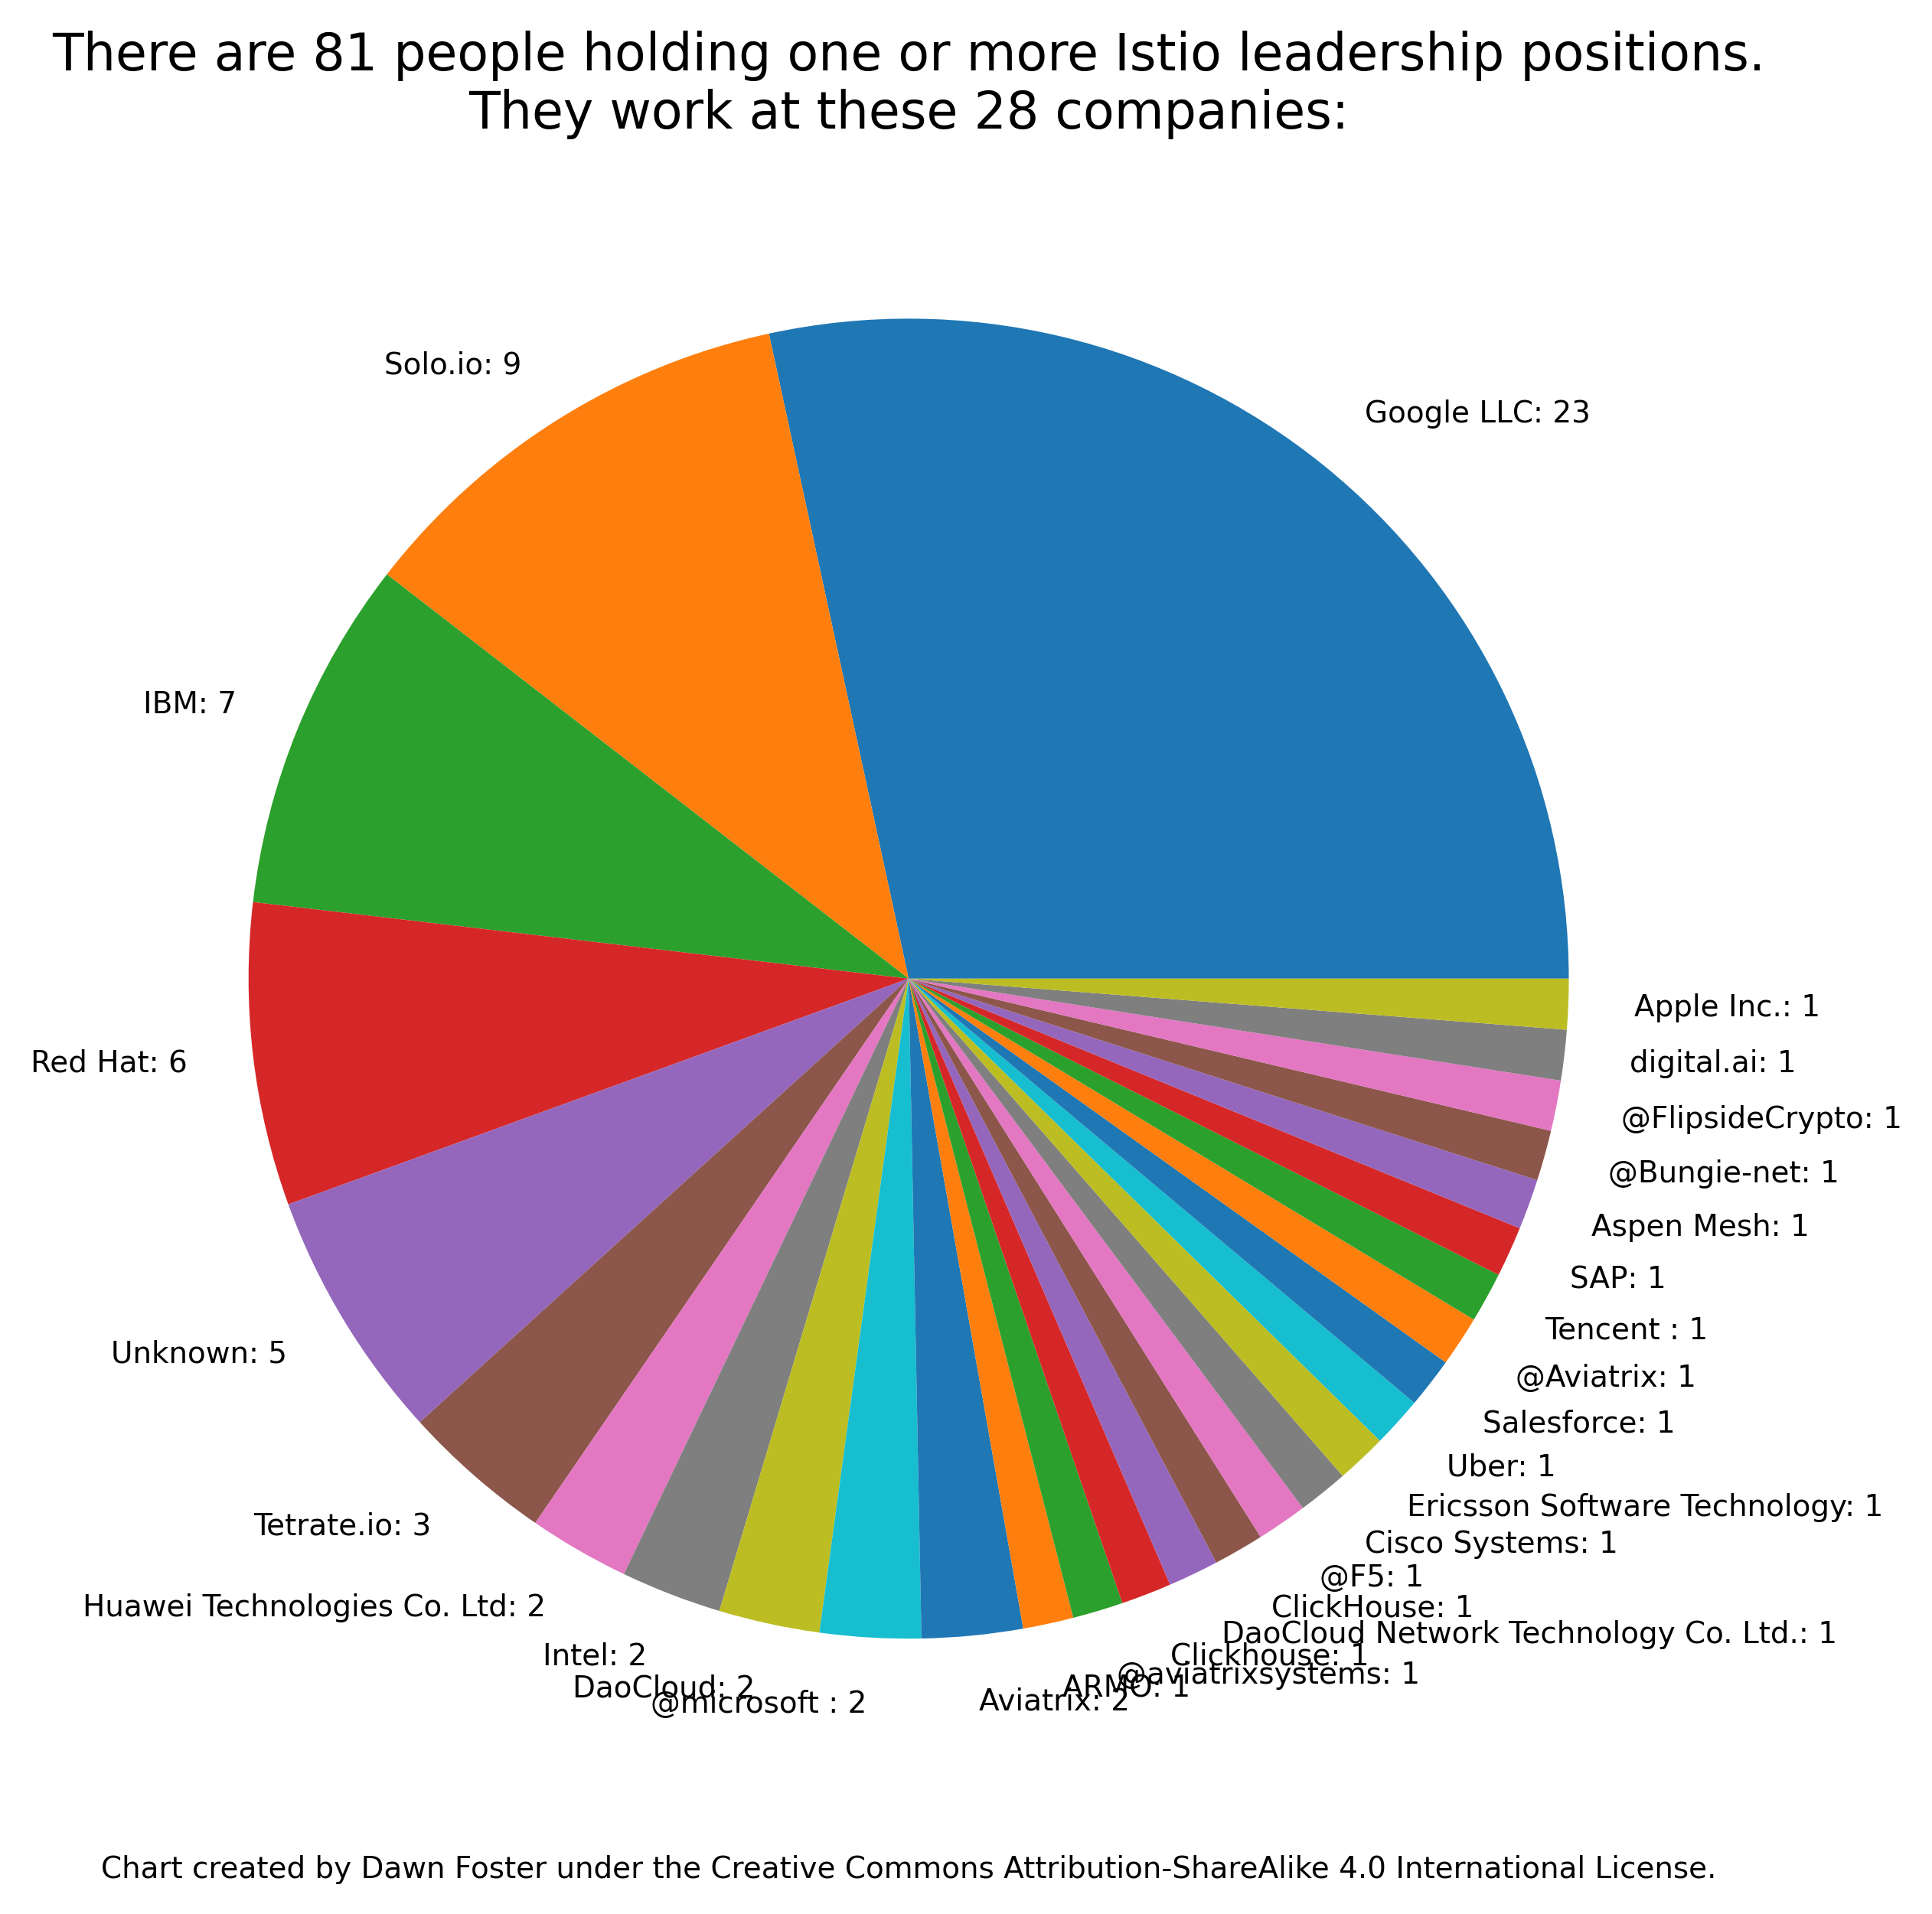

In [4]:
# Generate a pie chart from the above data
from matplotlib import pyplot as plt

data = [x[1] for x in company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(users)) + ' people holding one or more Istio leadership positions.\nThey work at these ' + str(len(company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.', fontsize=7)

plt.pie(data, labels = labels, textprops={'fontsize': 7})
plt.show()
fig.savefig('istio_graphs_2023-06-28/all_leaders.png', dpi=fig.dpi)

## Most Significant Leadership Positions by Username

Looks at just the people holding positions on the Steering Committee, Technical Oversight Committee (TOC), and Working Group (WG) Lead positions.

In [5]:
top_leadersDF = istioDF.loc[(istioDF['team'] == 'Steering Committee') | 
                            (istioDF['team'] == 'Technical Oversight Committee') |
                            (istioDF['team'] == 'Working Group Leads')]
top_leadersDF

,company,username,team
101,Google LLC,ameer00,Steering Committee
102,Unknown,cetezadi,Steering Committee
103,Solo.io,christian-posta,Steering Committee
104,ARMO,craigbox,Steering Committee
105,IBM,ctrath,Steering Committee
106,Google LLC,howardjohn,Steering Committee
107,Huawei Technologies Co. Ltd,hzxuzhonghu,Steering Committee
108,Intel,irisdingbj,Steering Committee
109,Google LLC,justinpettit,Steering Committee
110,Ericsson Software Technology,kfaseela,Steering Committee


In [6]:
# Get an array of unique GitHub usernames
top_users = top_leadersDF['username'].unique()
print('These', len(top_users), 'users hold one or more significant leadership positions:')
print(top_users)

# Use a dictionary to map company affiliation to each unique username
top_user_dict = {}
for x in top_leadersDF.iterrows():
    username = x[1].username
    company = x[1].company
    top_user_dict[username] = company

top_company_list = list(top_user_dict.values())
top_company_agg = Counter(top_company_list).most_common()
print("\nThey work at these", len(top_company_agg), "companies:")
top_company_agg

These 26 users hold one or more significant leadership positions:
['ameer00' 'cetezadi' 'christian-posta' 'craigbox' 'ctrath' 'howardjohn'
 'hzxuzhonghu' 'irisdingbj' 'justinpettit' 'kfaseela' 'rcernich'
 'thisisnotapril' 'zirain' 'ericvn' 'linsun' 'louiscryan' 'nrjpoddar'
 'esnible' 'frankbu' 'jacob-delgado' 'liminw' 'lizan' 'mandarjog'
 'Monkeyanator' 'myidpt' 'stevenctl']

They work at these 12 companies:


[('Google LLC', 7),
 ('Solo.io', 5),
 ('IBM', 4),
 ('Huawei Technologies Co. Ltd', 2),
 ('Unknown', 1),
 ('ARMO', 1),
 ('Intel', 1),
 ('Ericsson Software Technology', 1),
 ('Red Hat', 1),
 ('@F5', 1),
 ('Tetrate.io', 1),
 ('Aviatrix', 1)]

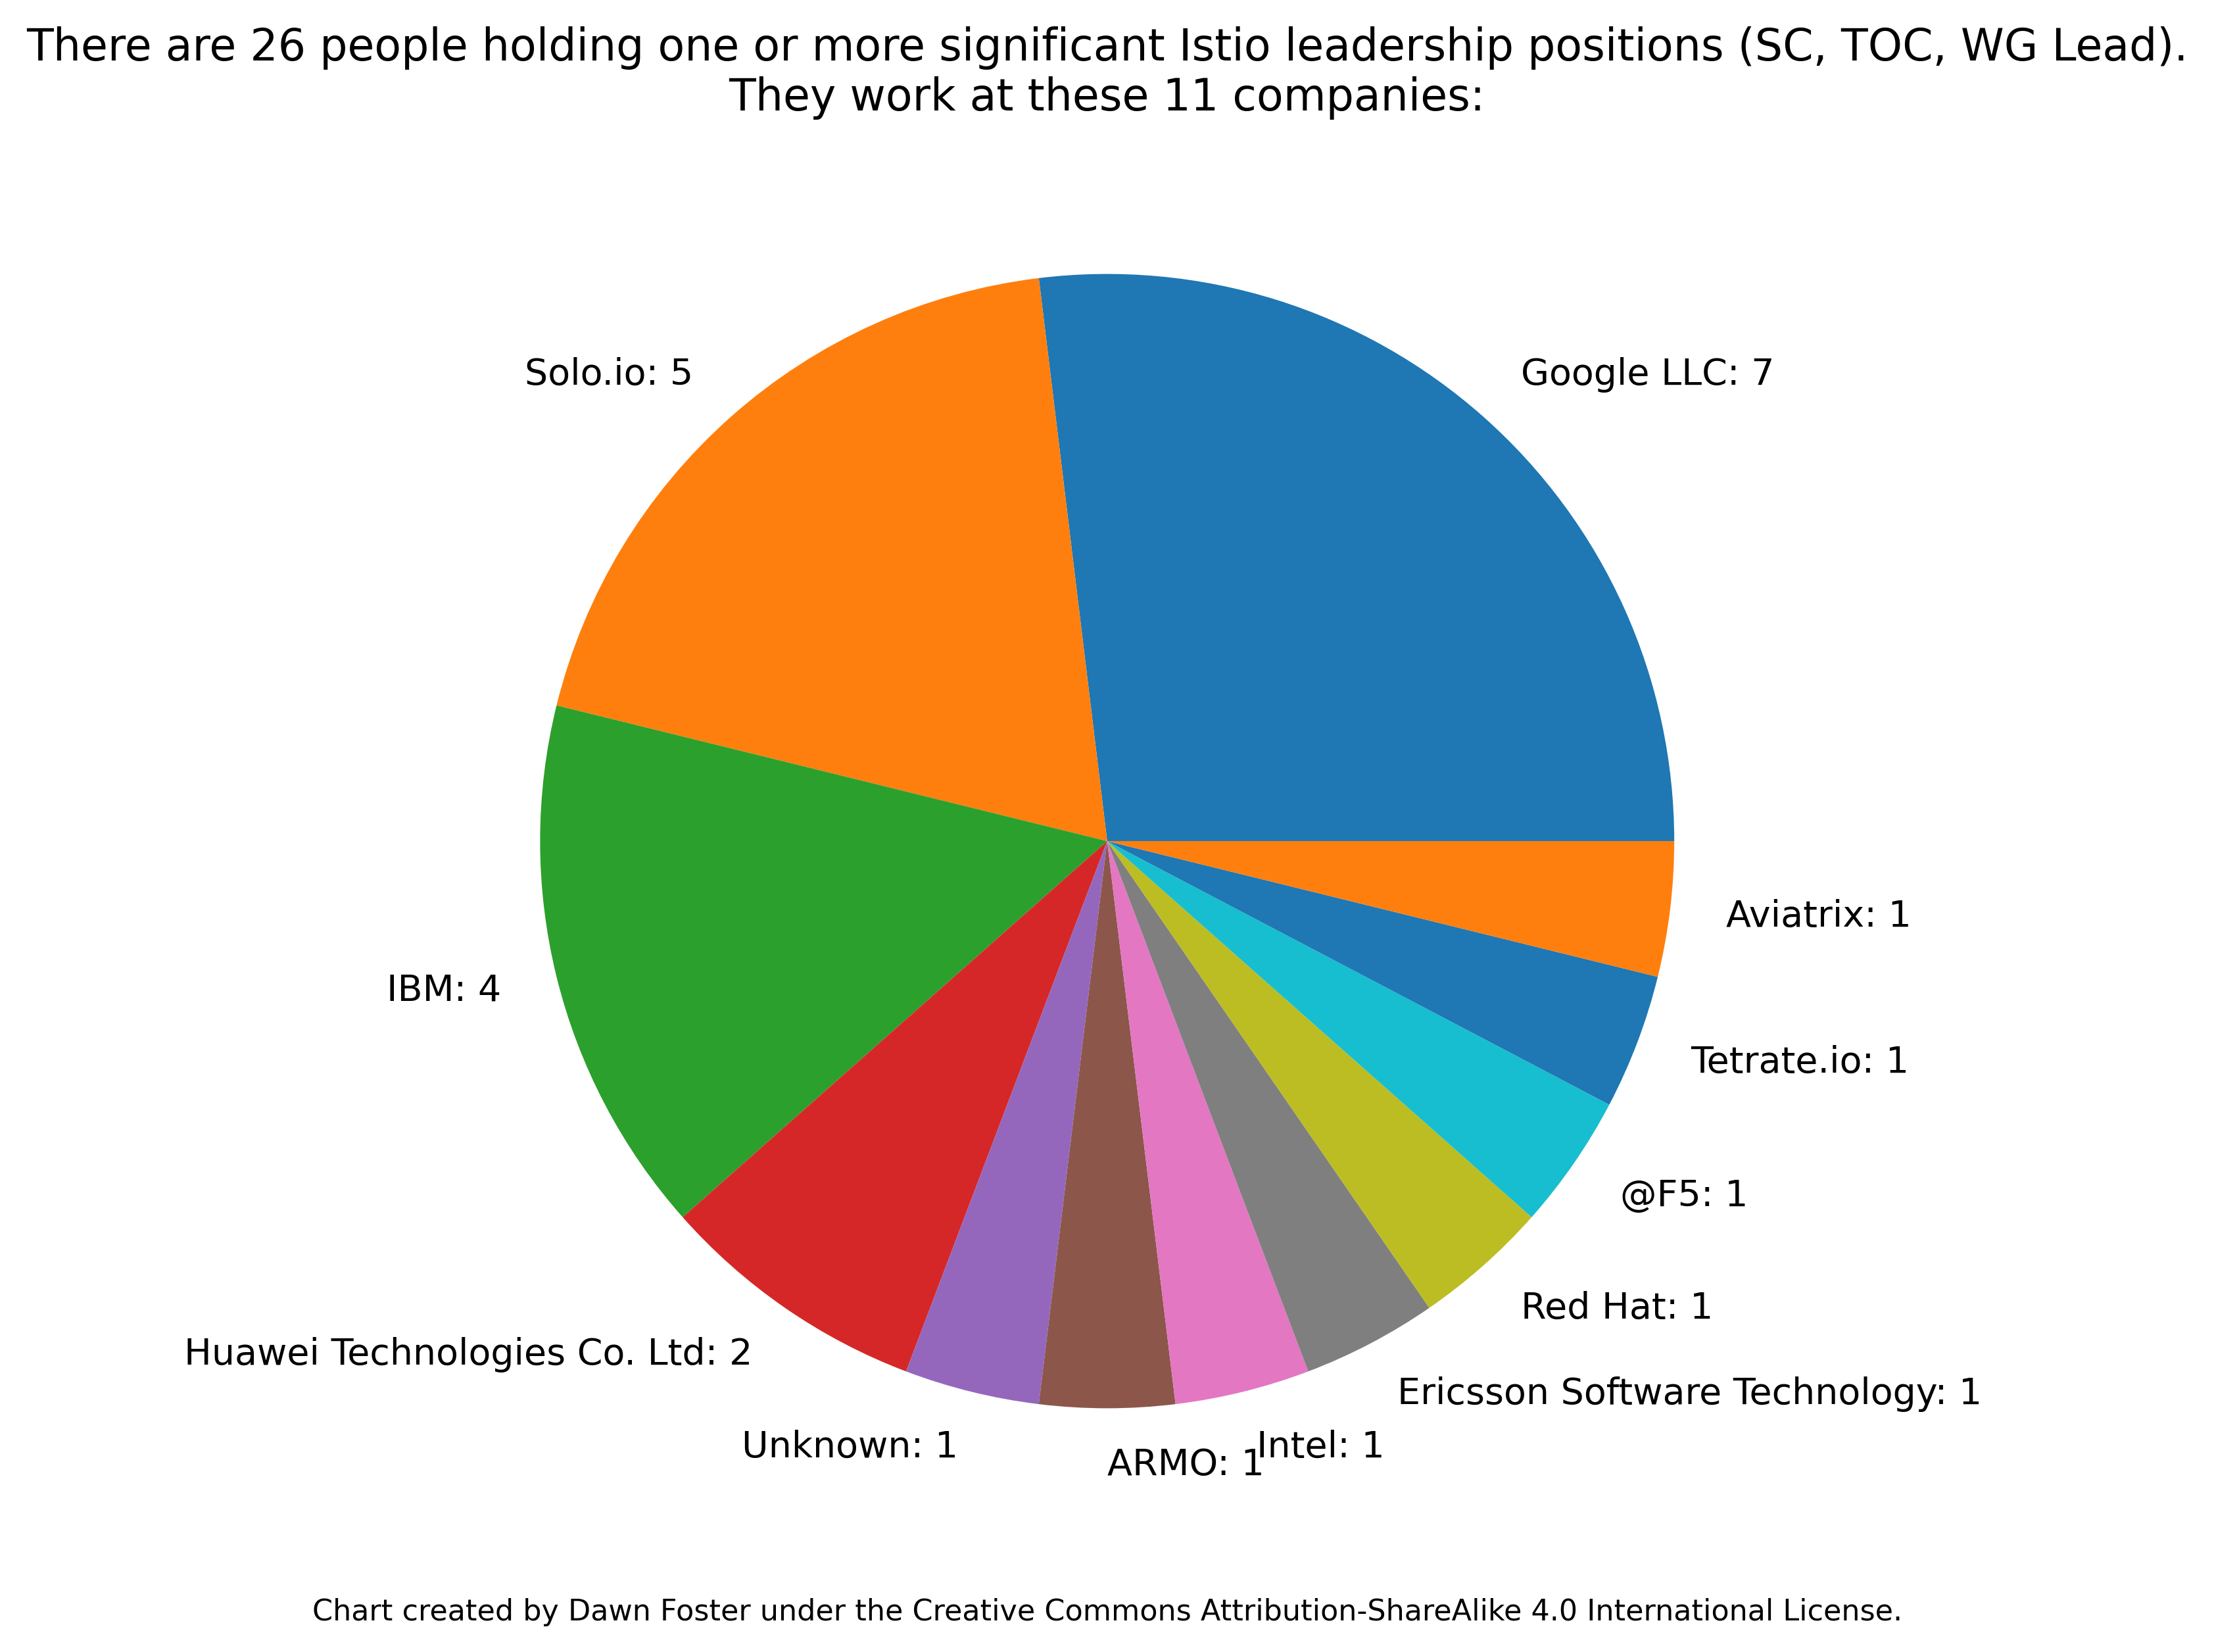

In [7]:
# Generate a pie chart from the above data about significant leadership positions
data = [x[1] for x in top_company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in top_company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(top_users)) + ' people holding one or more significant Istio leadership positions (SC, TOC, WG Lead).\nThey work at these ' + str(len(top_company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.', fontsize=8)

plt.pie(data, labels = labels)
plt.show()
fig.savefig('istio_graphs_2023-06-28/top_leaders.png', dpi=fig.dpi)

## All Leadership Roles by Company
**Note: includes duplicates as many people hold multiple roles**

In [8]:
all_companies = istioDF.value_counts('company')
print("There are", len(istioDF), "leadership roles (including some duplication) held by people working at these companies:")
print(all_companies)

There are 271 leadership roles (including some duplication) held by people working at these companies:
company
Google LLC                              73
Solo.io                                 42
IBM                                     28
Red Hat                                 14
Aviatrix                                14
Huawei Technologies Co. Ltd             12
Tetrate.io                              10
Intel                                    9
Unknown                                  8
Ericsson Software Technology             7
ARMO                                     7
@F5                                      6
DaoCloud                                 6
@Aviatrix                                4
DaoCloud Network Technology Co. Ltd.     4
Clickhouse                               3
Salesforce                               3
@microsoft                               3
Tencent                                  3
@aviatrixsystems                         3
ClickHouse                   